In [ ]:
# 01_explore_features.ipynb


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


feature_path = "../Data/Training_data/holes_features_many_mesh.txt"
df = pd.read_csv(feature_path, delim_whitespace=True)
df = df.drop(columns=["edge_mean", "plane_mean", "omnivaraiance", "eigensum"])  # Drop the first two unnamed columns
print("✅ Dataset loaded — shape:", df.shape)
df.columns = ["Curvature", "Linearity", "Planarity", "Average radius", "Points inside", "Gradient dist"]

df.head()



/tmp/ipykernel_49744/752971363.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(feature_path, delim_whitespace=True)


✅ Dataset loaded — shape: (4950604, 6)


,curvature,linearity,planarity,Average_radius,pointsInside,grad_dist
0,0.005246,0.352136,0.639173,1.666688,20.0,0.214000
1,0.004597,0.317272,0.674957,1.666688,19.0,0.227522
2,0.004989,0.319441,0.672133,1.666688,20.0,0.229918
3,0.006526,0.488792,0.501281,1.666688,18.0,0.227228
4,0.004515,0.093603,0.897750,1.666688,23.0,0.219903


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
curvature,4950604.0,0.006468,0.019284,0.000000,0.000000,0.000316,0.001812,0.294309
linearity,4950604.0,0.212150,0.111160,0.000094,0.133407,0.199924,0.273342,0.995320
planarity,4950604.0,0.776049,0.123752,0.003183,0.716233,0.793224,0.861449,0.999906
Average_radius,4950604.0,2.704819,1.208458,1.576107,1.895253,2.239377,3.208730,16.893829
pointsInside,4950604.0,21.418983,1.957925,1.000000,20.000000,21.000000,23.000000,93.000000
grad_dist,4950604.0,0.099850,0.600117,0.000000,0.000000,0.037815,0.105462,1217.734009


In [22]:
import os
save_path = os.path.join(os.getcwd(), "correlation_matrix.png")

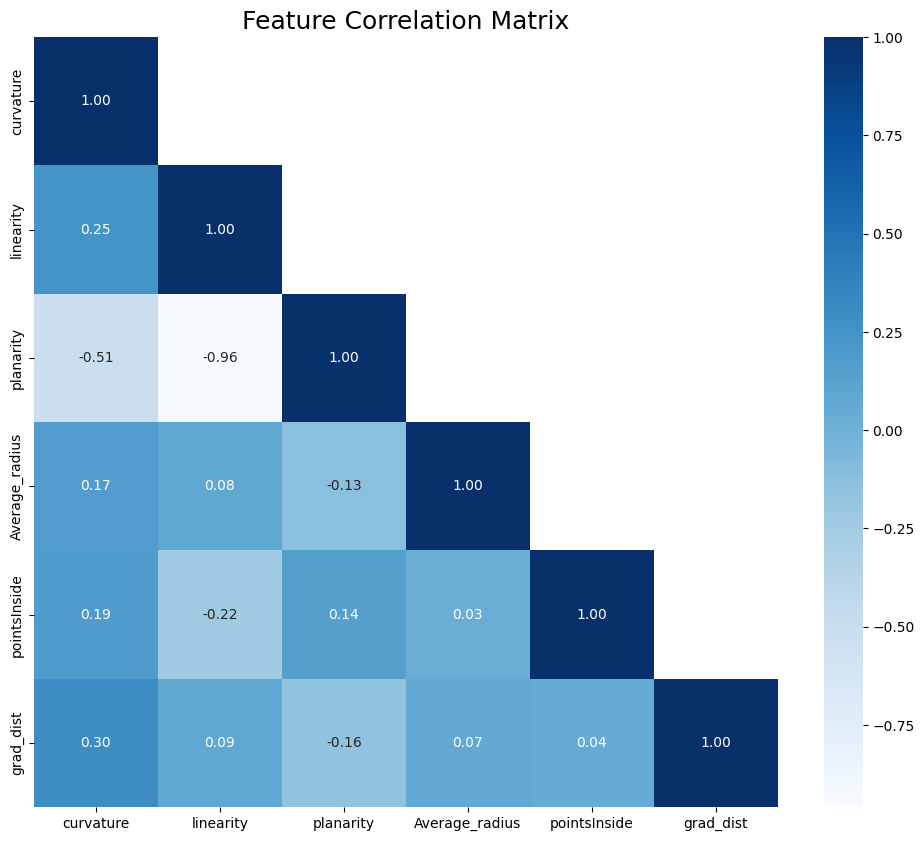

In [ ]:
import numpy as np

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(df.corr(), dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f", mask=mask)
plt.title("Feature Correlation Matrix", fontsize=18)
plt.savefig(save_path, dpi=2000, bbox_inches='tight')
plt.show()
